<a href="https://colab.research.google.com/github/saicharan-r/ERAv2/blob/main/S5/S5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/ERAv2/S5

/content/gdrive/MyDrive/ERAv2/S5


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

import model
import utils


In [4]:
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

CUDA Available? False


In [5]:
#load data
train_loader, test_loader = utils.load_data(batch_size=512)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


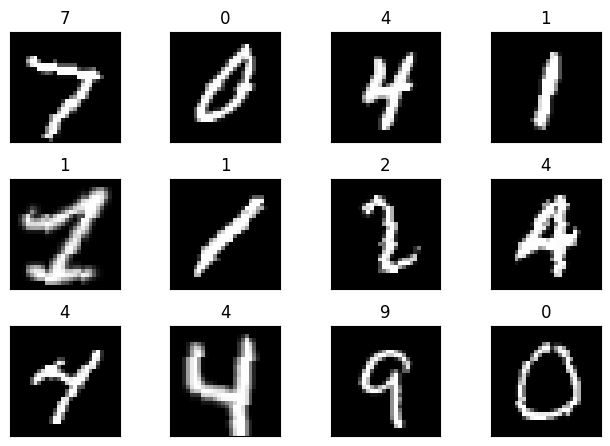

In [6]:
utils.visualise_data(12, train_loader)

In [7]:
# load model and summarise
device = 'cuda' if cuda else 'cpu'
mymodel = model.Net().to(device)
utils.summarise_model(mymodel)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [8]:
train_losses = []
test_losses = []
train_accs = []
test_accs = []
test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [9]:
# train model
optimizer = optim.SGD(mymodel.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
criterion = nn.CrossEntropyLoss()
num_epochs = 5
for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_loss,train_acc = model.train(mymodel, device, train_loader, optimizer, criterion)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    test_loss,test_acc = model.test(mymodel, device, test_loader, criterion)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    scheduler.step()

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch 1


Train: Loss=0.1007 Batch_id=117 Accuracy=61.97: 100%|██████████| 118/118 [06:48<00:00,  3.47s/it]


Test set: Average loss: 0.0004, Accuracy: 9370/10000 (93.70%)

Epoch 2


Train: Loss=0.1723 Batch_id=117 Accuracy=94.73: 100%|██████████| 118/118 [06:37<00:00,  3.37s/it]


Test set: Average loss: 0.0002, Accuracy: 9747/10000 (97.47%)

Epoch 3


Train: Loss=0.1100 Batch_id=117 Accuracy=96.49: 100%|██████████| 118/118 [06:38<00:00,  3.38s/it]


Test set: Average loss: 0.0001, Accuracy: 9821/10000 (98.21%)

Epoch 4


Train: Loss=0.1271 Batch_id=117 Accuracy=97.24: 100%|██████████| 118/118 [06:29<00:00,  3.30s/it]


Test set: Average loss: 0.0001, Accuracy: 9846/10000 (98.46%)

Epoch 5


Train: Loss=0.0637 Batch_id=117 Accuracy=97.70: 100%|██████████| 118/118 [06:37<00:00,  3.37s/it]


Test set: Average loss: 0.0001, Accuracy: 9829/10000 (98.29%)



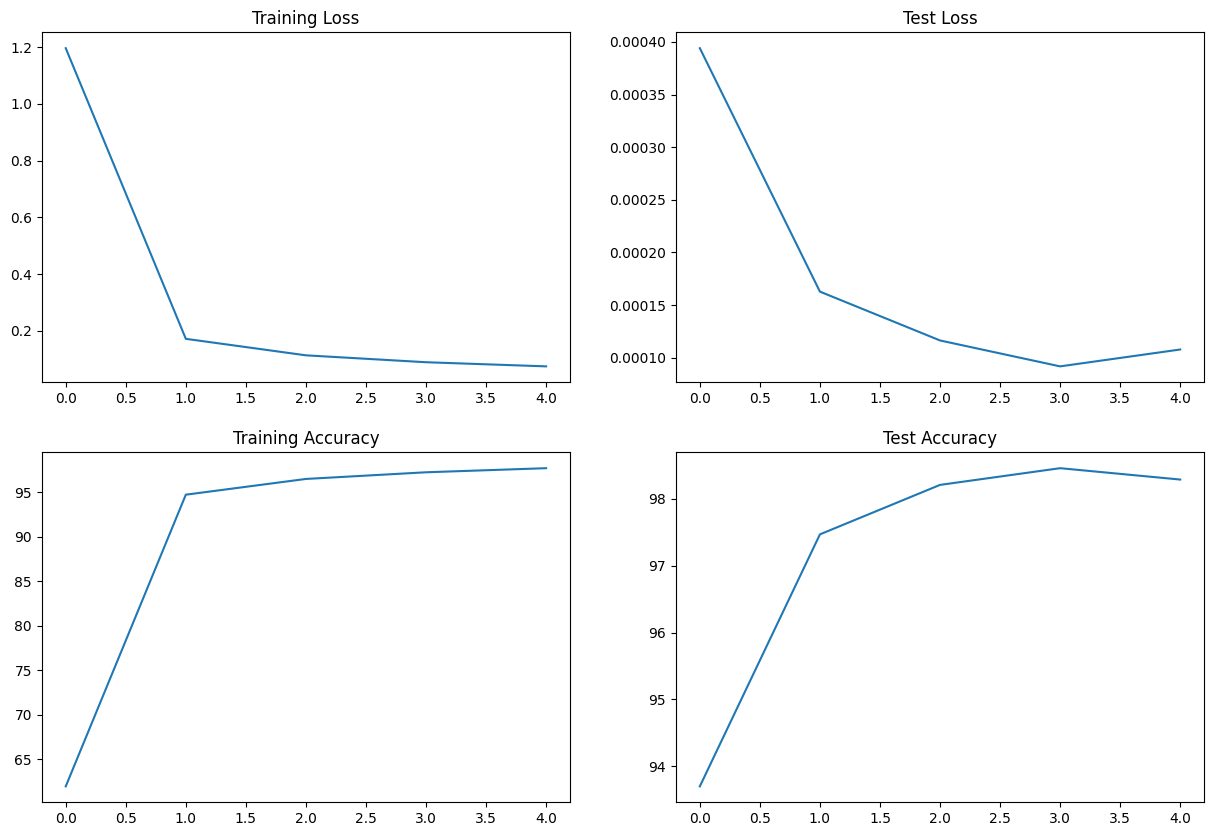

In [10]:
#utils
utils.plot_losses(train_losses,train_accs,test_losses,test_accs)